# Pregunta 5

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pytesseract

In [2]:
letritas = cv2.imread('imagenes/Ex3Preg5.tif', 0)

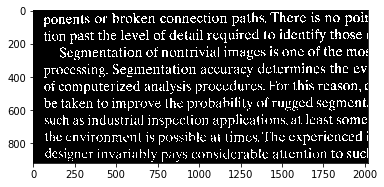

In [3]:
plt.imshow(letritas, cmap = 'gray');

Hay que deshacerse de las letras partidas de la orilla derecha.

In [4]:
def limpiar_bordes(imagen, lkernel):
    """Esta función elimina los objetos que tocan el borde de una imagen,
    utilizando reconstrucción por dilatación geodésica."""
    ancho = imagen.shape[0]
    largo = imagen.shape[1]
    
    # Crear el marcador: imagen que es cero en todos lados salvo
    # en los bordes, que coinciden con los de la imagen.
    marcador = np.zeros((ancho, largo), dtype = "uint8")
    marcador[0] = np.ones(largo, dtype = "uint8")
    marcador[ancho - 1] = np.ones(largo, dtype = "uint8")
    marcador[:, 0] = np.ones(ancho, dtype = "uint8").T
    marcador[:, largo - 1] = np.ones(ancho, dtype = "uint8").T
    marcador = marcador * imagen
    marcador = np.uint8(marcador)
    
    # Crear kernel para dilatación
    kernel = np.ones((lkernel, lkernel), np.uint8)
    
    D_vieja = marcador
    D_nueva = np.bitwise_and(cv2.dilate(marcador, kernel, iterations = 1), imagen)
    
    while np.array_equal(D_nueva, D_vieja) == False:
        D_vieja = D_nueva
        D_nueva = np.bitwise_and(cv2.dilate(D_nueva, kernel, iterations = 1), imagen)
        
    return imagen - D_nueva

In [5]:
letras_limpias = limpiar_bordes(letritas, 3)

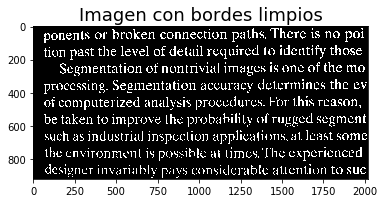

In [6]:
plt.imshow(letras_limpias, cmap = 'gray')
plt.title("Imagen con bordes limpios", size = 18);

In [7]:
letras_string = pytesseract.image_to_string(letras_limpias)

__a)__ Haga una función que, automáticamente, cuente cuántas letras hay en la imagen.

In [8]:
def contar_letras(string_de_img):
    # Dejar solo las letras
    puras_letras = string_de_img.replace(" ", "")
    puras_letras = puras_letras.replace(",", "")
    puras_letras = puras_letras.replace(".","")
    puras_letras = puras_letras.replace("\n", "")
    
    return len(puras_letras)

In [9]:
print("En total hay", contar_letras(letras_string), "letras en la imagen")

En total hay 408 letras en la imagen


__b)__ Haga una función que, automáticamente, cuente cuántas letras mayúsculas hay en la imagen. La función debe regresar también una tabla cuyas columnas indiquien el renglón y el número de letra en el que aparece la mayúscula en dicho renglón.

In [10]:
def partir_en_lineas(string_de_img):
    copia_string = string_de_img
    i_del_salto = copia_string.find('\n')
    lineas = []

    while i_del_salto != -1:
        lineas.append(copia_string[0:i_del_salto])
        copia_string = copia_string[i_del_salto + 1:]
        i_del_salto = copia_string.find('\n')
    
    lineas.append(copia_string)
    
    return lineas

In [11]:
def contar_mayusculas(lineas_de_img):
    contador = 0
    
    print('Mayúsculas:\n letra\t renglón  columna')

    for i in range(len(lineas)):
        linea = lineas[i]
        for c in range(len(linea)):
            if linea[c].isupper():
                print(linea[c], '\t', i + 1, '\t', c + 1)
                contador += 1
    
    return contador

In [12]:
lineas = partir_en_lineas(letras_string)

In [13]:
total_mayusculas = contar_mayusculas(lineas)
print("\nEn total hay", total_mayusculas, "letras mayúsculas en la imagen")

Mayúsculas:
 letra	 renglón  columna
T 	 1 	 37
S 	 3 	 1
S 	 4 	 13
F 	 5 	 38
T 	 8 	 39

En total hay 5 letras mayúsculas en la imagen


__c)__ Haga una función que, automáticamente, cuente cuántas letras “o” minúsculas hay en la imagen. La función debe regresar también una tabla cuyas columnas indiquen el renglón y el número de letra en el que aparece la “o” en dicho renglón.

In [14]:
def contar_oes(lineas_de_img):
    contador = 0
    
    print('o minúscula:\nrenglón\tcolumna')

    for i in range(len(lineas)):
        linea = lineas[i]
        for c in range(len(linea)):
            if linea[c] == 'o':
                print(i + 1, '\t', c + 1)
                contador += 1
    
    return contador

In [15]:
total_oes = contar_oes(letras_string)
print("\nEn total hay", total_oes, "letras o minúsculas")

o minúscula:
renglón	columna
1 	 2
1 	 9
1 	 14
1 	 20
1 	 27
1 	 47
1 	 50
2 	 3
2 	 21
2 	 41
2 	 54
3 	 11
3 	 14
3 	 18
3 	 38
3 	 42
3 	 50
4 	 3
4 	 23
5 	 1
5 	 5
5 	 28
5 	 39
5 	 51
6 	 11
6 	 17
6 	 27
6 	 37
7 	 28
7 	 40
7 	 55
8 	 10
8 	 21
9 	 27
9 	 46
9 	 50

En total hay 36 letras o minúsculas
